In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
data = pd.read_csv('Salary_Data.csv')
pd.set_option('display.max_rows', None)

In [5]:
data.shape

(6704, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [7]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Gender', 'Education Level', 'Job Title']

for col in cols_cat:
  print(f'Columna {col}: {data[col].unique()} subniveles\n')

Columna Gender: ['Male' 'Female' nan 'Other'] subniveles

Columna Education Level: ["Bachelor's" "Master's" 'PhD' nan "Bachelor's Degree" "Master's Degree"
 'High School' 'phD'] subniveles

Columna Job Title: ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative 

In [8]:
for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles\n')

Columna Gender: 3 subniveles

Columna Education Level: 7 subniveles

Columna Job Title: 193 subniveles



# Etapa 1 - Datos faltantes

In [9]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [10]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


# Etapa 2 - Columnas irrelevantes

### Renombramiento de columnas

In [11]:
data.rename(columns={'Education Level': 'Education_Level',
                      'Job Title': 'Job_Title',
                      'Years of Experience': 'Years_of_Experience'}, inplace= True)
data.columns

Index(['Age', 'Gender', 'Education_Level', 'Job_Title', 'Years_of_Experience',
       'Salary'],
      dtype='object')

### Transformación de valores a minúscula

In [12]:
columnas_categoricas = ['Gender', 'Education_Level', "Job_Title"]

#Se transforman en minúscula
for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in columnas_categoricas:
        data[column] = data[column].str.lower()

data.head()



,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,male,bachelor's,software engineer,5.0,90000.0
1,28.0,female,master's,data analyst,3.0,65000.0
2,45.0,male,phd,senior manager,15.0,150000.0
3,36.0,female,bachelor's,sales associate,7.0,60000.0
4,52.0,male,master's,director,20.0,200000.0


In [13]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Gender', 'Education_Level', 'Job_Title']

In [14]:
for col in cols_cat:
  print(f'Columna {col}: {data[col].unique()} subniveles\n')


Columna Gender: ['male' 'female' 'other'] subniveles

Columna Education_Level: ["bachelor's" "master's" 'phd' "bachelor's degree" "master's degree"
 'high school'] subniveles

Columna Job_Title: ['software engineer' 'data analyst' 'senior manager' 'sales associate'
 'director' 'marketing analyst' 'product manager' 'sales manager'
 'marketing coordinator' 'senior scientist' 'software developer'
 'hr manager' 'financial analyst' 'project manager' 'customer service rep'
 'operations manager' 'marketing manager' 'senior engineer'
 'data entry clerk' 'sales director' 'business analyst' 'vp of operations'
 'it support' 'recruiter' 'financial manager' 'social media specialist'
 'software manager' 'junior developer' 'senior consultant'
 'product designer' 'ceo' 'accountant' 'data scientist'
 'marketing specialist' 'technical writer' 'hr generalist'
 'project engineer' 'customer success rep' 'sales executive' 'ux designer'
 'operations director' 'network engineer' 'administrative assistant'
 's

In [15]:
for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles\n')

Columna Gender: 3 subniveles

Columna Education_Level: 6 subniveles

Columna Job_Title: 190 subniveles



### Columnas numéricas

In [16]:
data.describe()

,Age,Years_of_Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### Valores de la columna Education_Level reducido/unidos

In [17]:
data['Education_Level'].unique()

array(["bachelor's", "master's", 'phd', "bachelor's degree",
       "master's degree", 'high school'], dtype=object)

In [18]:
# Define a dictionary to map current values to new standardized values
education_map = {
    "bachelor's degree": "bachelor's",
    "master's degree": "master's",
}

# Use the map to replace the values
data['Education_Level'] = data['Education_Level'].replace(education_map)

data['Education_Level'].unique()

array(["bachelor's", "master's", 'phd', 'high school'], dtype=object)

### Reducción de valores en la columna de Job_Title

#### Prueba 1

In [19]:
#dataxd = data.copy()

In [20]:
#dataxd.info()

In [21]:
#dataxd['Job Title'].unique()

In [22]:
#dataxd['Job_Title'].value_counts()

In [23]:
#trabajos_clasificados = ['engineer','analyst','manager','director','coordinator','scientist','developer','costumer','consultant','designer','specialist','representative','copywriter','support','advisor']

#data['Job_Classification'] = 'other'

# Loop through classifications and assign them to 'Job Classification' where appropriate
#for classification in trabajos_clasificados:
#    data.loc[data['Job_Title'].str.contains(classification, case=False, na=False), 'Job_Classification'] = classification

# Verify the changes

#print(data['Job_Classification'].value_counts())

#### Prueba 2

In [24]:
data['Job_Title'].unique()

array(['software engineer', 'data analyst', 'senior manager',
       'sales associate', 'director', 'marketing analyst',
       'product manager', 'sales manager', 'marketing coordinator',
       'senior scientist', 'software developer', 'hr manager',
       'financial analyst', 'project manager', 'customer service rep',
       'operations manager', 'marketing manager', 'senior engineer',
       'data entry clerk', 'sales director', 'business analyst',
       'vp of operations', 'it support', 'recruiter', 'financial manager',
       'social media specialist', 'software manager', 'junior developer',
       'senior consultant', 'product designer', 'ceo', 'accountant',
       'data scientist', 'marketing specialist', 'technical writer',
       'hr generalist', 'project engineer', 'customer success rep',
       'sales executive', 'ux designer', 'operations director',
       'network engineer', 'administrative assistant',
       'strategy consultant', 'copywriter', 'account manager',
      

In [25]:
# Define a list of classifications
classifications = ['Engineer', 'Analyst', 'Associate', 'Director', 
                   'Coordinator', 'Scientist', 'Developer', 'Representative',
                   'Clerk', 'Rep', 'Support', 'Specialist', 'Consultant', 
                   'Designer', 'Writer', 'Generalist', 'Researcher', 
                   'Accountant', 'Recruiter', 'Officer', 'Advisor', 
                   'Producer', 'Copywriter']  # 'Manager' removed

# Create a new column 'Job Classification' initialized with 'Other'
data['Job Classification'] = 'Other'

# Loop through classifications and assign them to 'Job Classification' where appropriate
for classification in classifications:
    data.loc[data['Job_Title'].str.contains(classification, case=False, na=False), 'Job Classification'] = classification

# Titles like 'CEO', 'VP', 'Executive', and 'Man' to be classified as 'Executive'
executives = ['CEO', 'VP', 'Executive', 'Man']
for executive in executives:
    data.loc[data['Job_Title'].str.contains(executive, case=False, na=False), 'Job Classification'] = 'Executive' 

# Classify 'Manager'
data.loc[data['Job_Title'].str.contains('Manager', case=False, na=False), 'Job Classification'] = 'Manager'

# Verify the changes
print(data['Job Classification'].value_counts())

Job Classification
Manager        1757
Engineer       1448
Developer       832
Scientist       638
Analyst         622
Director        437
Associate       219
Coordinator     212
Designer        110
Generalist      107
Executive        99
Rep              89
Other            65
Specialist       34
Accountant        6
Advisor           5
Recruiter         4
Consultant        4
Copywriter        2
Researcher        2
Officer           2
Writer            1
Support           1
Clerk             1
Producer          1
Name: count, dtype: int64


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education_Level      6698 non-null   object 
 3   Job_Title            6698 non-null   object 
 4   Years_of_Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
 6   Job Classification   6698 non-null   object 
dtypes: float64(3), object(4)
memory usage: 418.6+ KB


In [27]:
data.drop('Job_Title', axis = 1, inplace = True)
data.rename(columns={'Job Classification': 'Job_Title'}, inplace = True)

In [28]:
for col in cols_cat:
  print(f'Columna {col}: {data[col].unique()} subniveles\n')

Columna Gender: ['male' 'female' 'other'] subniveles

Columna Education_Level: ["bachelor's" "master's" 'phd' 'high school'] subniveles

Columna Job_Title: ['Engineer' 'Analyst' 'Manager' 'Associate' 'Director' 'Coordinator'
 'Scientist' 'Developer' 'Rep' 'Clerk' 'Executive' 'Support' 'Recruiter'
 'Specialist' 'Consultant' 'Designer' 'Accountant' 'Writer' 'Generalist'
 'Other' 'Copywriter' 'Researcher' 'Officer' 'Advisor' 'Producer'] subniveles



## Etapa 3 - Filas repetidas

In [29]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (6698, 6)
Tamaño del set después de eliminar las filas repetidas: (1731, 6)


## Etapa 4 - Valores grandes

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1731 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1731 non-null   float64
 1   Gender               1731 non-null   object 
 2   Education_Level      1731 non-null   object 
 3   Years_of_Experience  1731 non-null   float64
 4   Salary               1731 non-null   float64
 5   Job_Title            1731 non-null   object 
dtypes: float64(3), object(3)
memory usage: 94.7+ KB


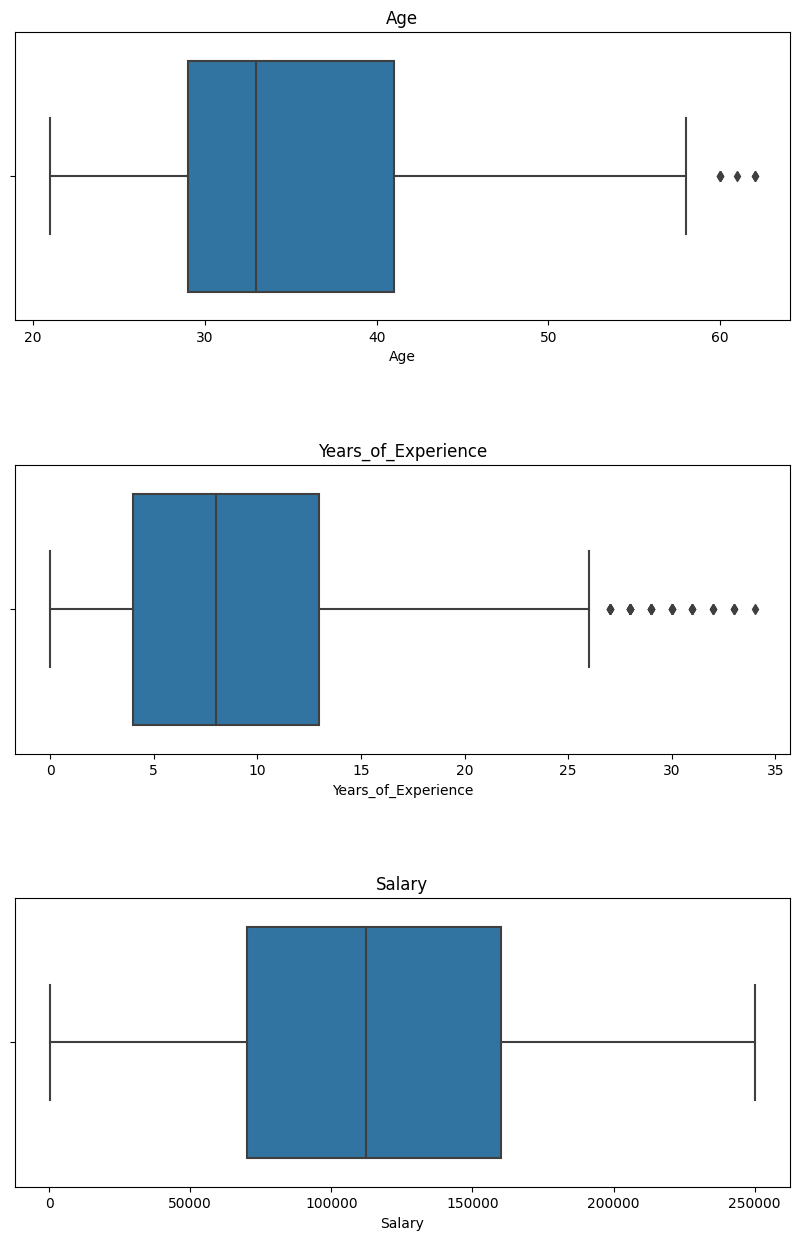

In [31]:
cols_num = ['Age', 'Years_of_Experience', 'Salary']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,15))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

### Visuluzación de correlación de data

Correlación entre Age y Salary: 0.7637688284080536


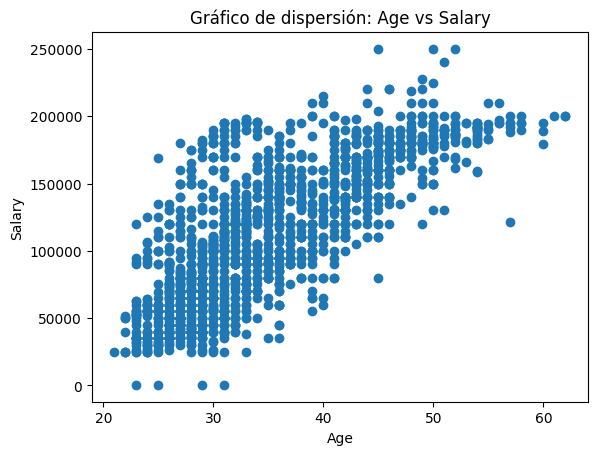

In [32]:
# Calcular la correlación entre las dos columnas
correlation = data['Age'].corr(data['Salary'])
print("Correlación entre Age y Salary:", correlation)

# Crear un gráfico de dispersión para visualizar la relación
plt.scatter(data['Age'], data['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Gráfico de dispersión: Age vs Salary')
plt.show()

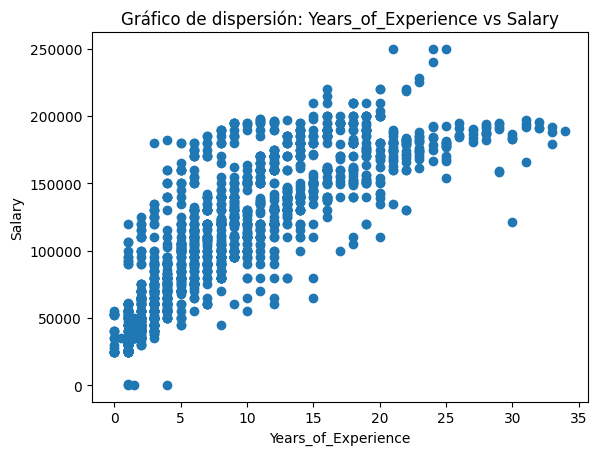

In [33]:
# Crear un gráfico de dispersión para visualizar la relación
plt.scatter(data['Years_of_Experience'], data['Salary'])
plt.xlabel('Years_of_Experience')
plt.ylabel('Salary')
plt.title('Gráfico de dispersión: Years_of_Experience vs Salary')
plt.show()

In [34]:
data['Salary'].describe()

count      1731.000000
mean     113777.577701
std       51562.477847
min         350.000000
25%       70000.000000
50%      112439.000000
75%      160000.000000
max      250000.000000
Name: Salary, dtype: float64

### Prueba sin outliers

In [35]:
data_sin_outliers = data.copy()

#### Edad

In [36]:
while True:
    Q1 = data_sin_outliers['Age'].quantile(0.25)
    Q3 = data_sin_outliers['Age'].quantile(0.75)
    IQR = Q3 - Q1

    bigotes_superior =  (Q1 + 1.5 * IQR)
    bigotes_inferior =  (Q1 - 1.5 * IQR)

    ubicacion_outliers =  (data_sin_outliers['Age'] < bigotes_inferior) | (data_sin_outliers['Age'] > bigotes_superior )
    
    if ubicacion_outliers.sum() == 0:
        # No quedan outliers, detener el proceso
        break
    
    # Eliminar los outliers y actualizar el DataFrame
    data_sin_outliers = data_sin_outliers[~ubicacion_outliers]

print("\nDatos sin outliers:\n", data_sin_outliers)


Datos sin outliers:
        Age  Gender Education_Level  Years_of_Experience    Salary    Job_Title
0     32.0    male      bachelor's                  5.0   90000.0     Engineer
1     28.0  female        master's                  3.0   65000.0      Analyst
3     36.0  female      bachelor's                  7.0   60000.0    Associate
5     29.0    male      bachelor's                  2.0   55000.0      Analyst
7     31.0    male      bachelor's                  4.0   80000.0      Manager
8     26.0  female      bachelor's                  1.0   45000.0  Coordinator
10    29.0    male        master's                  3.0   75000.0    Developer
12    35.0    male      bachelor's                  6.0   65000.0      Analyst
14    27.0    male      bachelor's                  2.0   40000.0          Rep
16    33.0  female        master's                  7.0   90000.0      Manager
18    25.0  female      bachelor's                  0.0   35000.0        Clerk
20    34.0  female        mast

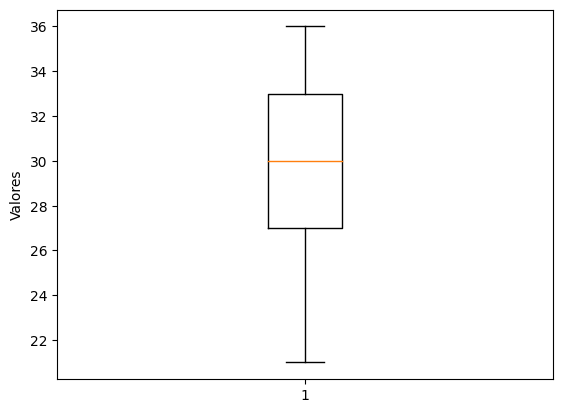

In [37]:
plt.boxplot(data_sin_outliers['Age'])
plt.ylabel('Valores')
plt.show()

### Prueba con los outliers intáctos

#### Edad

In [38]:
data['Age'].describe()

count    1731.000000
mean       35.173888
std         8.217726
min        21.000000
25%        29.000000
50%        33.000000
75%        41.000000
max        62.000000
Name: Age, dtype: float64

## Etapa 5 Analisis

In [39]:
data.columns

Index(['Age', 'Gender', 'Education_Level', 'Years_of_Experience', 'Salary',
       'Job_Title'],
      dtype='object')

In [40]:
grupo_genero = data['Gender']
grupo_edad = data['Age']
grupo_salario = data['Salary']
grupo_tipo_trabajo = data['Job_Title']

### Cantidad de personas por género

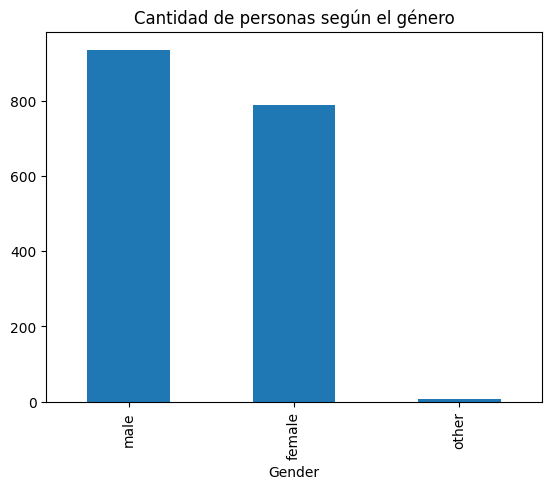

In [41]:
bar1=data.Gender.value_counts()
bar1.plot(kind='bar')
plt.title("Cantidad de personas según el género")
plt.show()

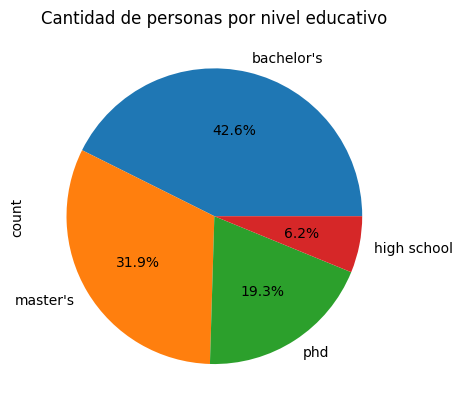

In [42]:
bar1=data['Education_Level'].value_counts()
bar1.plot(kind='pie', autopct="%1.1f%%")
plt.title("Cantidad de personas por nivel educativo")
plt.show()

### Cantidad de personas por trabajo

In [43]:
f = data.groupby('Gender')['Job_Title']
trabajos_por_genero = f.count()


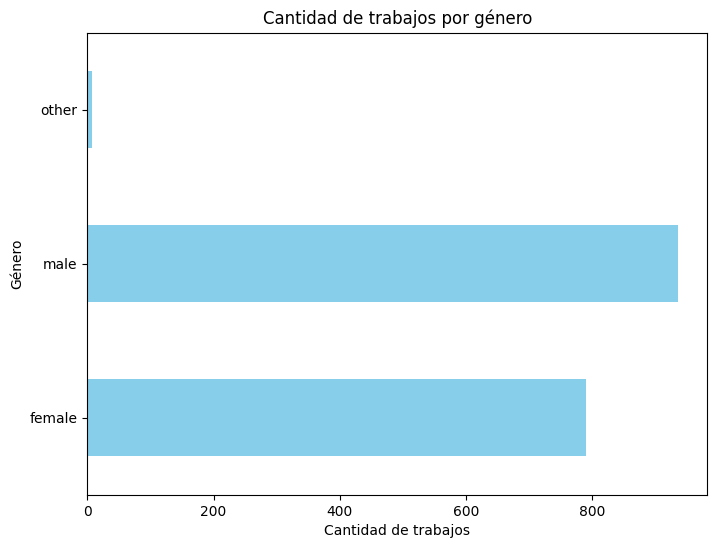

In [44]:
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si lo deseas

# Crear la gráfica de barras horizontales
trabajos_por_genero.plot(kind='barh', color='skyblue')

# Ajustar los títulos y etiquetas
plt.title('Cantidad de trabajos por género')
plt.xlabel('Cantidad de trabajos')
plt.ylabel('Género')

# Mostrar la gráfica
plt.show()

### Trabajo mejor pagado

In [45]:
b = data.groupby('Job_Title')['Salary'].max()

mayor_salario = b > 200000
trabajos_mayor_salario = b[mayor_salario]
trabajos_mayor_salario

Job_Title
Director     220000.0
Engineer     210000.0
Executive    250000.0
Manager      250000.0
Officer      250000.0
Scientist    240000.0
Name: Salary, dtype: float64

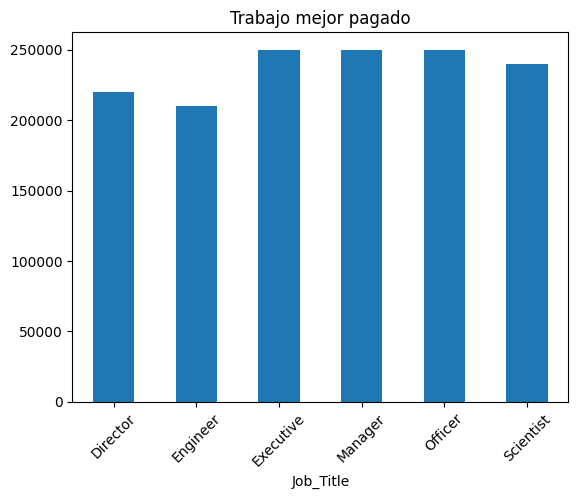

In [46]:
trabajos_mayor_salario.plot(kind='bar')
plt.title("Trabajo mejor pagado")
plt.xticks(rotation=45)
plt.show()

In [47]:
c = data.groupby('Gender')['Salary'].max()
c.head()

Gender
female    220000.0
male      250000.0
other     166109.0
Name: Salary, dtype: float64

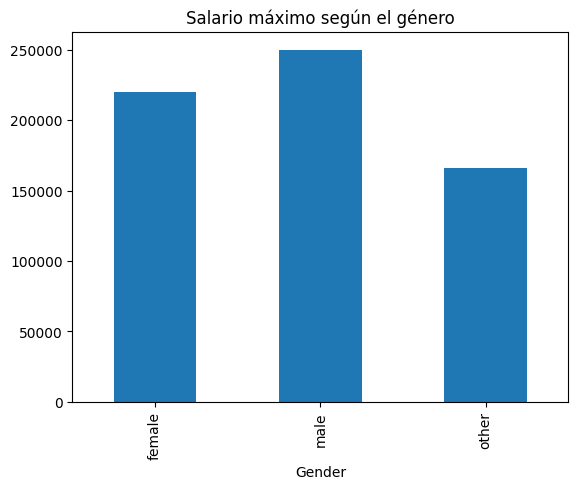

In [48]:

c.plot(kind='bar')
plt.title("Salario máximo según el género")
plt.show()

In [49]:
data['Gender'].value_counts()


Gender
male      935
female    789
other       7
Name: count, dtype: int64

In [50]:
xd = data['Gender'] == "other"
asd = data.groupby('Salary')['Gender']


### Regresión lineal>

In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data_copy = data

# Convertir variables categóricas usando codificación one-hot
categorical_cols = ['Gender', 'Education_Level', 'Job_Title']
#       'cat': Es un nombre asignado a esta transformación. En este caso, podría representar que se está aplicando una codificación one-hot a variables categóricas.
#       OneHotEncoder(): Es un objeto de la clase OneHotEncoder, que se utiliza para realizar la codificación one-hot en las columnas especificadas.
#       categorical_cols: Es una variable que debe contener las columnas del conjunto de datos que se desean codificar utilizando la técnica one-hot.
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')

#       Se elimina Salary del dataframe y quedan solamente las variables independientes
X = preprocessor.fit_transform(data_copy.drop(columns=['Salary']))
#       Es la variable dependiente
y = data_copy['Salary']

#       Ajustar el modelo de regresión lineal
regression_model = LinearRegression()
#       Rellena el modelo con los datos de la variables independientes y la dependiente para entrenarlos
regression_model.fit(X, y)

#       
y_pred = regression_model.predict(X)

# Imprimir los coeficientes y el intercepto del modelo
print("Coeficientes:", regression_model.coef_)
print("Intercepto:", regression_model.intercept_)


Coeficientes: [  2161.61634881   5694.79332999  -7856.40967878  -3337.71027015
 -15662.18206011   7385.13275865  11614.75957161 -14658.37714456
  -3400.11662675  16706.20459705 -14092.96666602 -12535.36636821
   4290.54127246  -9898.81168204 -17814.08959448  -5803.24444177
   7386.17615876  20134.42466442  26080.49146567   -433.04946571
 -12192.22436527  16190.89846834  72506.12830524 -15393.48549308
 -12948.11153089 -25197.86603167 -16712.75766256  -2892.66716589
  41289.26421673 -12747.63950858 -12371.21199124 -15492.14340996
    610.90897481   4121.02499518]
Intercepto: 33428.278765973126


In [52]:
# Datos del individuo para predecir
nueva_data = {
    'Age': [30],
    'Gender': ['male'],
    'Education_Level': ["master's"],
    'Job_Title': ['Engineer'],
    'Years_of_Experience': [2]
}

# Convertir los datos en un DataFrame
nueva_df = pd.DataFrame(nueva_data)

# Aplicar la misma transformación de codificación one-hot utilizada durante el entrenamiento
nueva_X = preprocessor.transform(nueva_df)

# Realizar la predicción
prediccion_salario = regression_model.predict(nueva_X)

# Imprimir la predicción del salario
print("Predicción del salario:", prediccion_salario[0])
r2 = r2_score(y, y_pred)
print(r2)

Predicción del salario: 99158.0155548804
0.7770182587522418


### Correlacion entre variables

In [80]:
correlation = data['Age'].corr(data['Salary'])

columnas_independientes = ['Age', 'Years_of_Experience']


for col in columnas_independientes:
    correlation = data[col].corr(data['Salary'])
    print(correlation)

0.7637688284080536
0.8155041170122503


### Regresión lineal 2

In [75]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#  Separar las características (X) y la variable objetivo (y)
X = data_copy.drop("Salary", axis=1)
y = data_copy["Salary"]

# Definir las columnas numéricas y categóricas
numeric_features = ["Age", "Years_of_Experience"]
categorical_features = ["Gender", "Education_Level", "Job_Title"]

# Crear un preprocesador para estandarizar las columnas numéricas y codificar las categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar el preprocesador en el conjunto de entrenamiento y transformar el conjunto de prueba
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

# Evaluar el modelo en el conjunto de prueba
score = model.score(X_test_preprocessed, y_test)
print(f"R-squared score on test set: {score:.2f}")

R-squared score on test set: 0.75


In [62]:
data_copy.columns

Index(['Age', 'Gender', 'Education_Level', 'Years_of_Experience', 'Salary',
       'Job_Title'],
      dtype='object')

In [67]:
data_copy['Education_Level'].unique()

array(["bachelor's", "master's", 'phd', 'high school'], dtype=object)

In [68]:
data_copy['Job_Title'].unique()

array(['Engineer', 'Analyst', 'Manager', 'Associate', 'Director',
       'Coordinator', 'Scientist', 'Developer', 'Rep', 'Clerk',
       'Executive', 'Support', 'Recruiter', 'Specialist', 'Consultant',
       'Designer', 'Accountant', 'Writer', 'Generalist', 'Other',
       'Copywriter', 'Researcher', 'Officer', 'Advisor', 'Producer'],
      dtype=object)

In [73]:
new_data = pd.DataFrame({
    'Age': [30, 35, 25],
    'Gender': ['male', 'female', 'male'],
    'Education_Level': ["bachelor's", "master's", "bachelor's"],
    'Job_Title': ['Engineer', 'Manager', 'Engineer'],
    'Years_of_Experience': [5, 10, 3]
})

In [76]:
# Preprocesar los nuevos datos de entrada
new_data_preprocessed = preprocessor.transform(new_data)

# Hacer predicciones con el modelo
predictions = model.predict(new_data_preprocessed)

# Evaluar el modelo en el conjunto de prueba
score2 = model.score(X_test_preprocessed, y_test)
print(f"R-squared score on test set: {score2:.2f}")

# Las predicciones estarán en el array 'predictions'
print(predictions)

R-squared score on test set: 0.75
[ 99601.68751794 121908.05368293  88061.04351094]
